Load dataset with 

In [8]:
from datasets import load_dataset

dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
print(dataset["full"][0])

{'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}


In [10]:
import re
import pandas as pd
import argparse
import pandas as pd
# import torch
# from transformers import RobertaTokenizer, RobertaForMaskedLM
import numpy as np
# import torch.nn as nn
# import torch.optim as optim

from matplotlib import pyplot as plt
from datetime import datetime

# from transformers import EncoderDecoderModel, BertTokenizer
from sklearn.model_selection import train_test_split
# from nltk.tokenize import word_tokenize
# from torch.utils.data import Dataset, DataLoader


In [11]:
import torch
torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)



cuda


In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyser = SentimentIntensityAnalyzer()

def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score


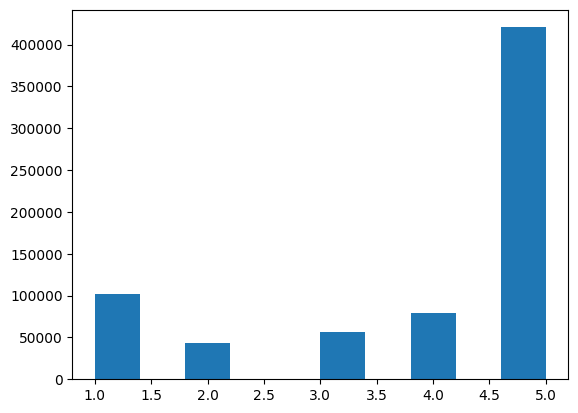

In [13]:
ratings = []
time = []
sent_score = []
plt.rcParams['agg.path.chunksize'] = 10000
for review in dataset["full"]:
    ratings.append(review['rating'])
    # print(review['timestamp'])
    dt_obj = datetime.fromtimestamp(review['timestamp']/1000)
    # print(dt_obj)
    time.append(dt_obj)
    sent_score.append(calculate_sentiment(review['text']))
    
plt.hist(ratings)
plt.savefig('AB_rating_hist.png')

# plt.scatter(time, ratings)


                     time  rating  sent_score
0 2020-05-05 10:08:48.923     5.0      0.8162
1 2020-05-04 14:10:55.070     4.0      0.7783
2 2020-05-16 17:41:06.052     5.0      0.8070
3 2022-01-28 13:13:50.220     1.0      0.0000
4 2020-12-30 05:02:43.534     5.0      0.6369


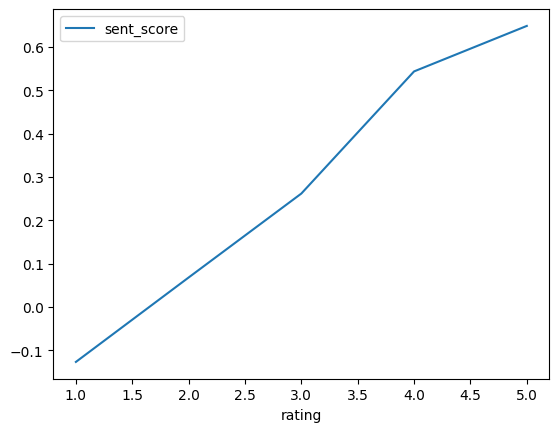

In [62]:
df1 = pd.DataFrame({'time': time, 'rating': ratings, 'sent_score': sent_score})
print(df1.head())
df1_mean = df1.resample('MS', on='time').mean().dropna()
# df1_mean.plot(y='rating', use_index=True).get_figure()
df1_mean_sent = df1.groupby('rating').mean().dropna()
fig = df1_mean_sent.plot(y='sent_score', use_index=True).get_figure()
fig.savefig('sent_AB.png')
# plt.scatter(df1['rating'], df1['sent_score'])

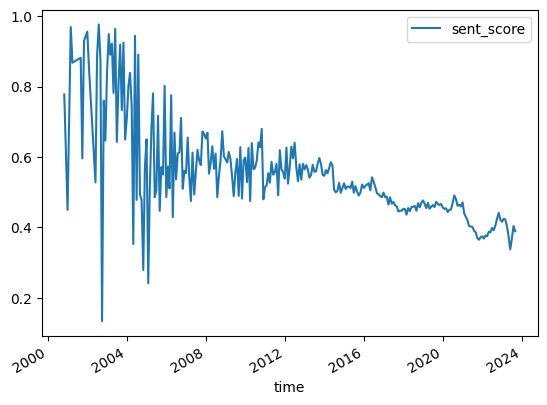

In [64]:
df1_mean = df1.resample('MS', on='time').mean().dropna()

fig = df1_mean.plot(y='sent_score', use_index=True).get_figure()
fig.savefig('sent_time_AB.png')

Now we do analysis on the generated titles compared to the original text and original title. Assumption is that generated titles may differ from 